# Import Libraries


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt


# Load Data


In [2]:
df=pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Describe The Data

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

Name -- 49992
Age -- 77
Gender -- 2
Blood Type -- 8
Medical Condition -- 6
Date of Admission -- 1827
Doctor -- 40341
Hospital -- 39876
Insurance Provider -- 5
Billing Amount -- 50000
Room Number -- 400
Admission Type -- 3
Discharge Date -- 1856
Medication -- 5
Test Results -- 3


In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.describe()


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


# Delete Duplicates

In [7]:
df.duplicated().sum()


534

In [8]:
df.drop_duplicates(inplace =True)


# Drop Name Column

In [9]:
df.drop(['Name'],axis =1 ,inplace =True)


# Visualizations

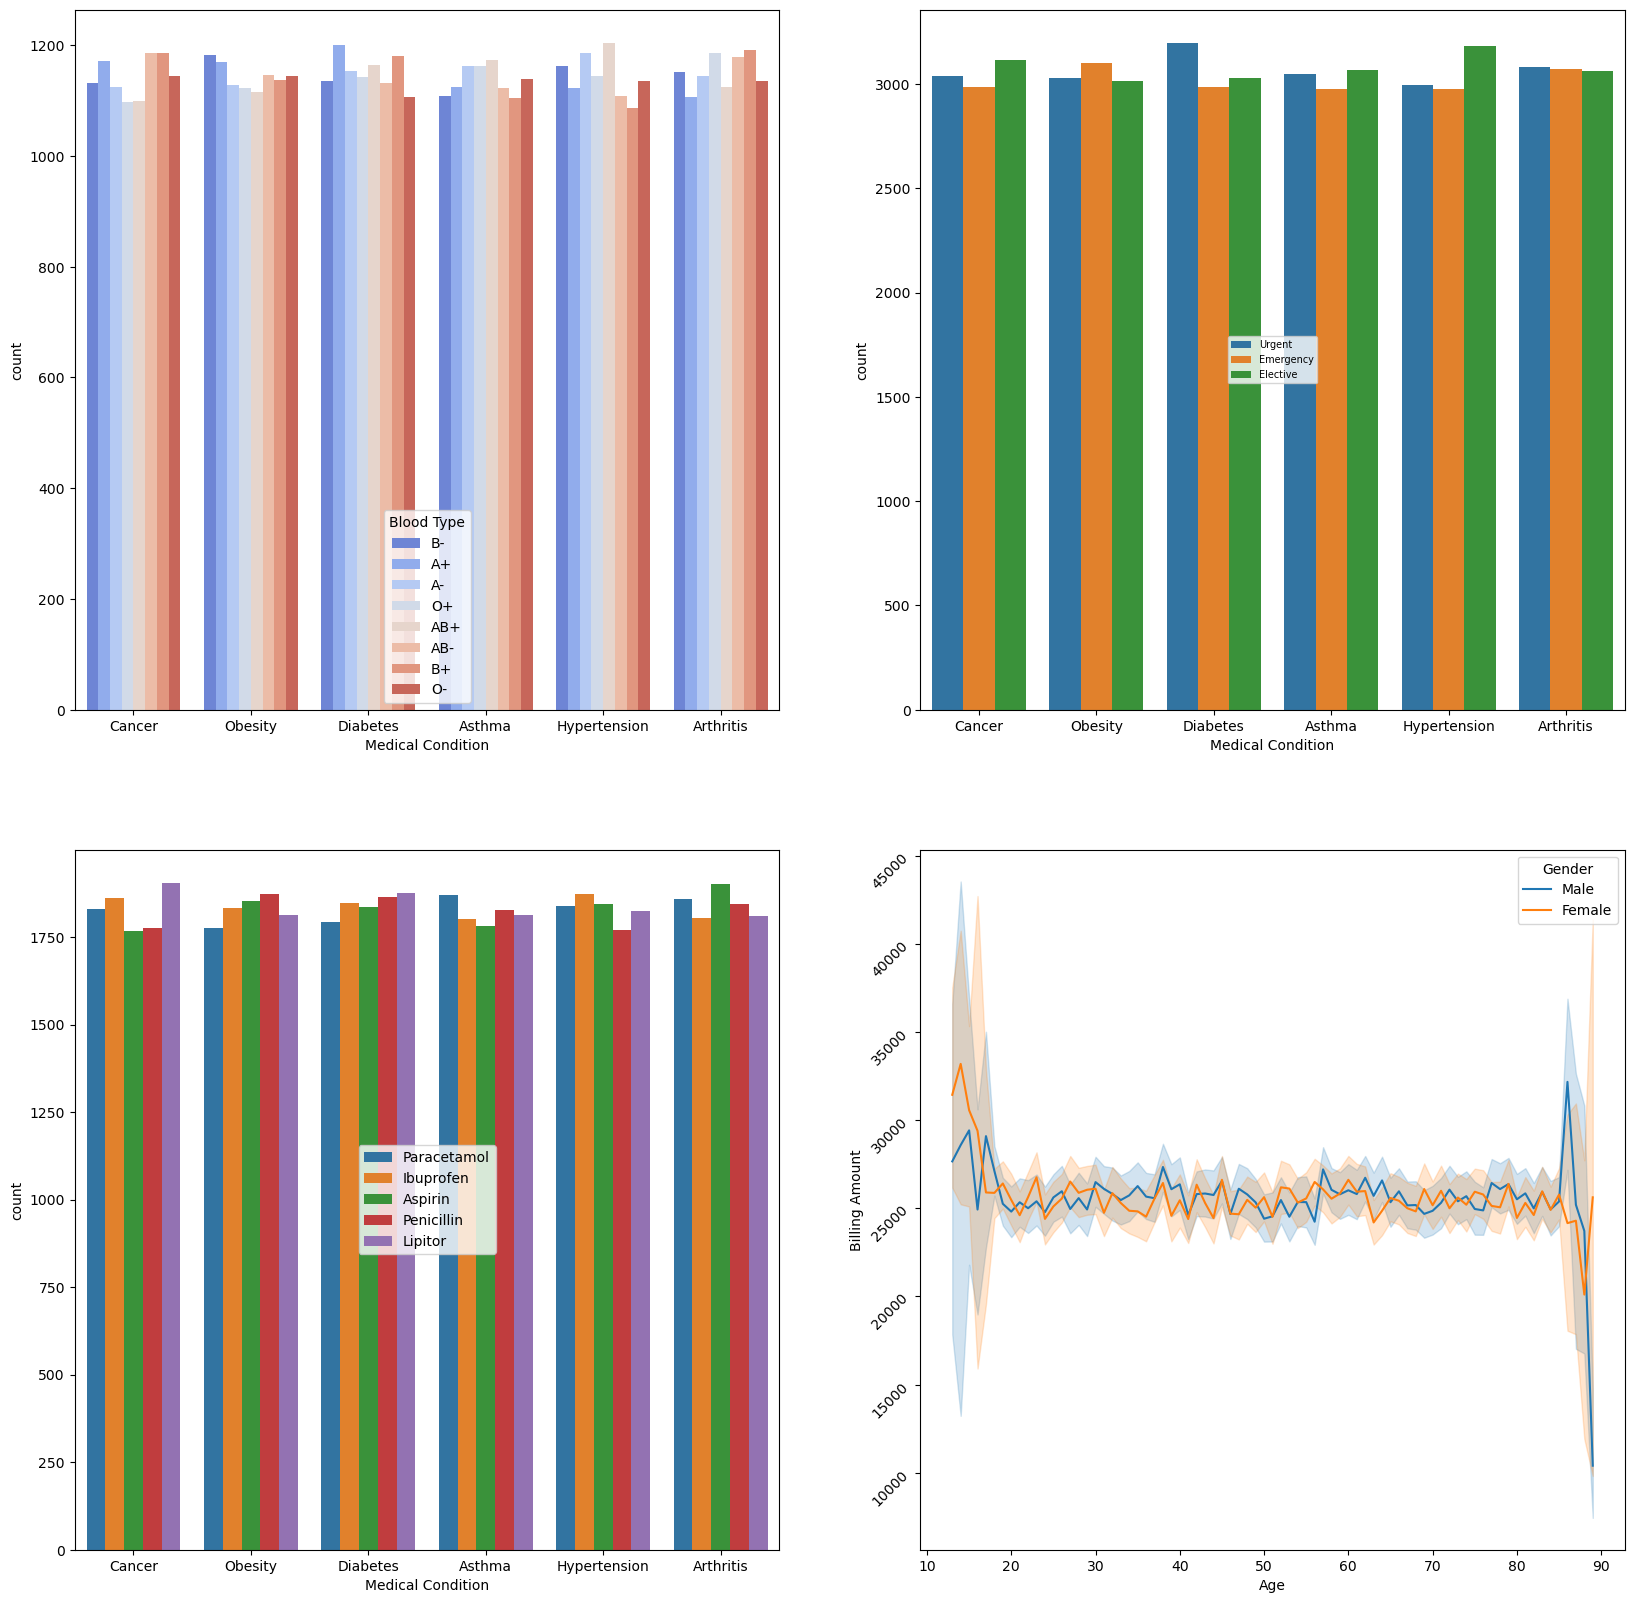

In [10]:
fig, ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Medical Condition',palette='coolwarm',hue='Blood Type',ax=ax[0][0])
sns.countplot(data=df,x='Medical Condition',hue='Admission Type',ax=ax[0][1])
sns.countplot(data=df,x='Medical Condition',hue='Medication',ax=ax[1][0])
sns.lineplot(data=df,x='Age',y='Billing Amount',hue=df['Gender'],ax=ax[1][1])
plt.yticks(rotation=45)
ax[0][1].legend(loc='center',fontsize=7)
ax[1][0].legend(loc='center')
plt.show()


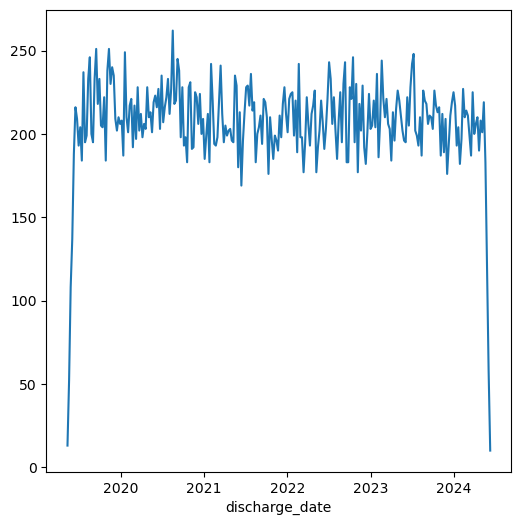

In [11]:
df.rename(columns={'Discharge Date':'discharge_date'},inplace=True)
df['discharge_date']=pd.to_datetime(df['discharge_date'])
df.set_index('discharge_date',inplace=True)
weekly_counts=df.resample('W').size()
plt.figure(figsize=(6,6))
sns.lineplot(x=weekly_counts.index,y=weekly_counts.values)
plt.show()

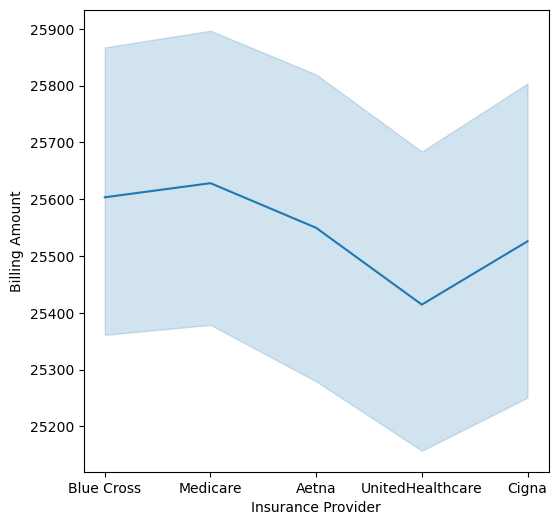

In [12]:
plt.figure(figsize=(6,6))
sns.lineplot(data=df,y=df['Billing Amount'],x=df['Insurance Provider'])
plt.show()

In [14]:
df.reset_index(inplace=True)

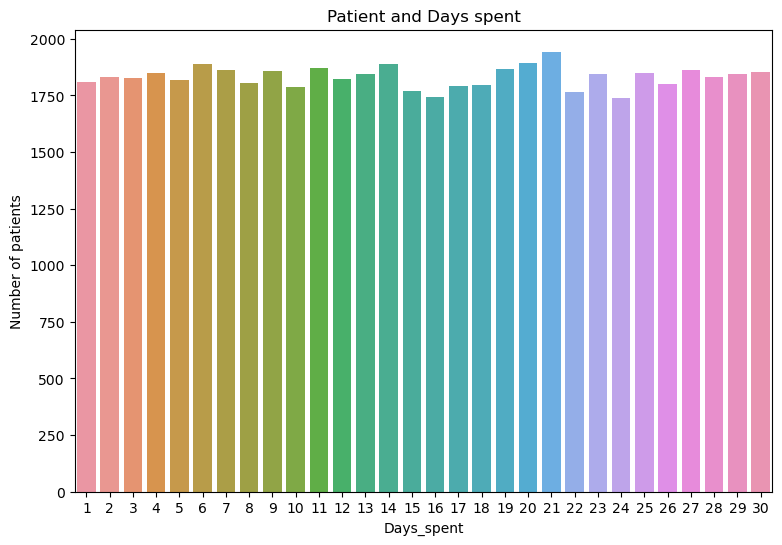

In [15]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['discharge_date']=pd.to_datetime(df['discharge_date'])
df['Days_spent']=(df['discharge_date']-df['Date of Admission']).dt.days
plt.figure(figsize=(9,6))
sns.countplot(x='Days_spent',data=df)
plt.ylabel('Number of patients')
plt.title("Patient and Days spent")
plt.show()

In [16]:
df.drop(['discharge_date','Date of Admission'],axis =1 ,inplace =True)

In [17]:
df.drop(['Room Number'],axis =1 ,inplace =True)


C:\Users\abanoup\AppData\Local\Temp\ipykernel_4160\3648873261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

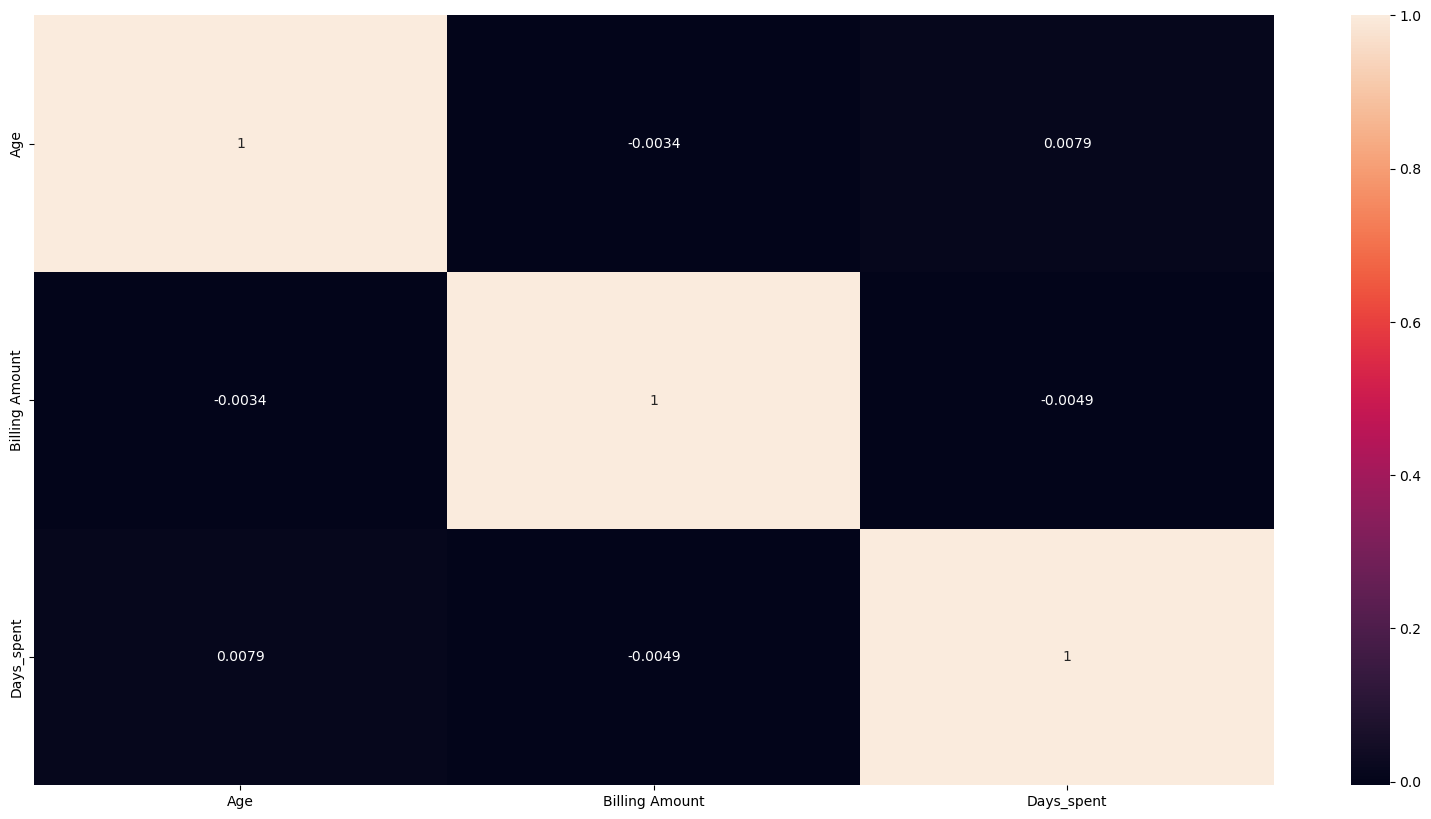

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Lipitor        1904
Ibuprofen      1862
Paracetamol    1829
Penicillin     1777
Aspirin        1768
Name: Medication, dtype: int64


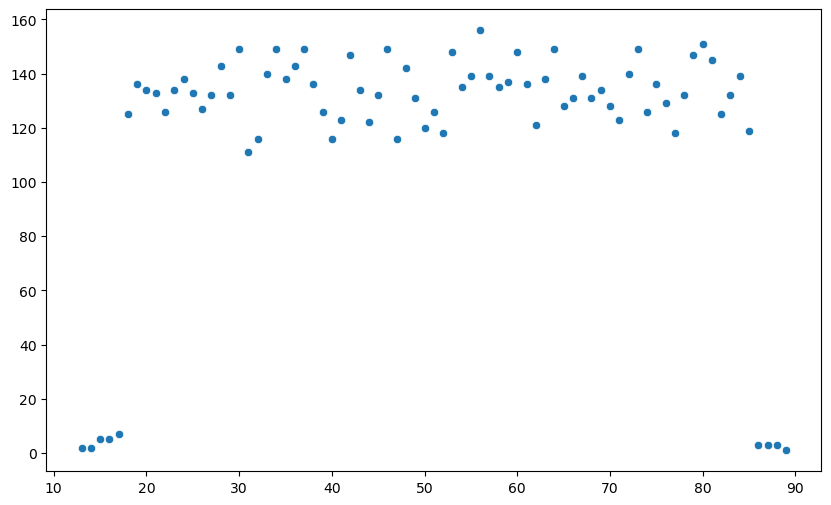

56    156
80    151
30    149
46    149
64    149
     ... 
88      3
86      3
14      2
13      2
89      1
Name: Age, Length: 77, dtype: int64


In [20]:
cancer_df=df[df['Medical Condition']=='Cancer']
age_counts=cancer_df['Age'].value_counts()
print(cancer_df['Medication'].value_counts())
plt.figure(figsize=(10,6))
sns.scatterplot(x=age_counts.index,y=age_counts.values)
plt.show()
print(age_counts)

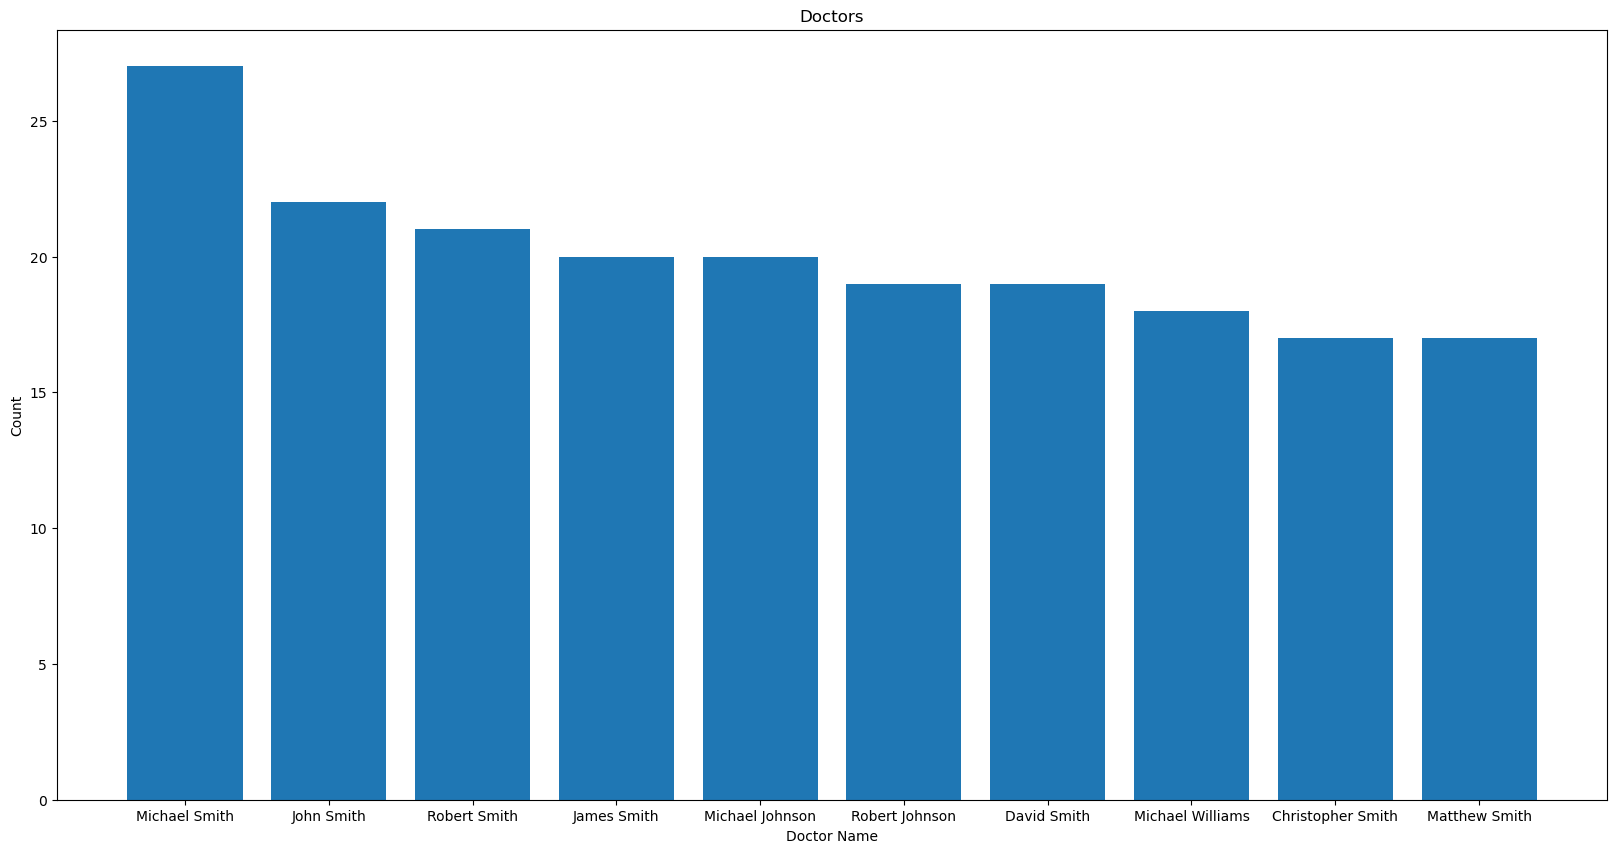

In [21]:
plt.figure(figsize=(20,10))
plt.bar(df.Doctor.value_counts().sort_values(ascending=False).head(10).index,
        df.Doctor.value_counts().sort_values(ascending=False).head(10))
plt.title("Doctors")
plt.xlabel("Doctor Name")
plt.ylabel('Count')
plt.show()

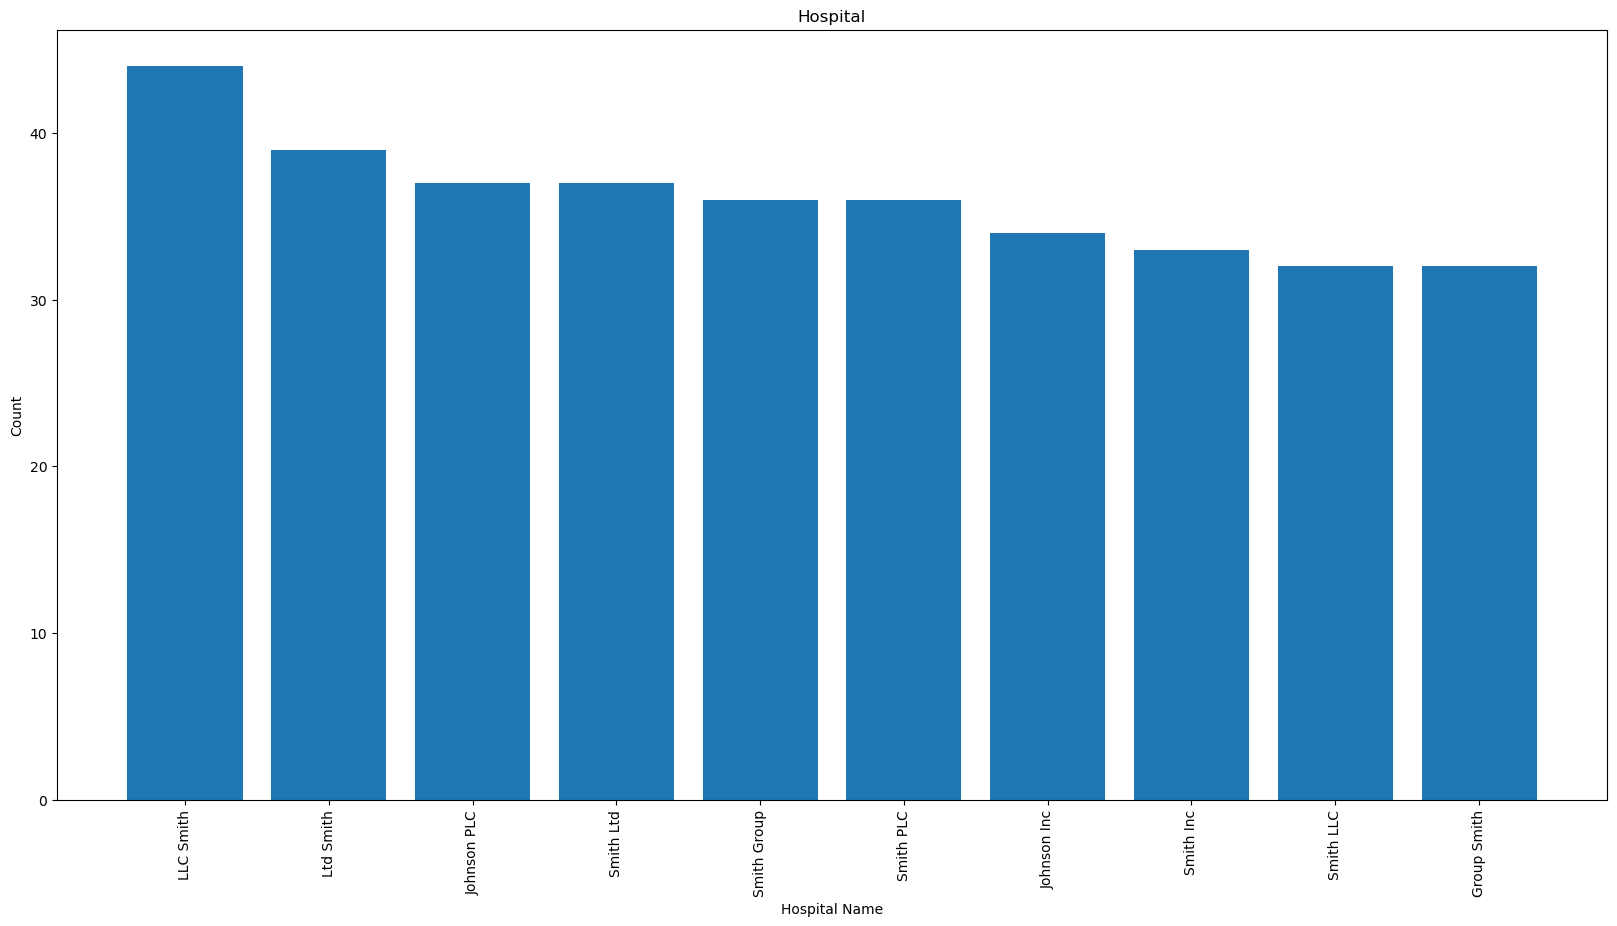

In [22]:
plt.figure(figsize=(20,10))
plt.bar(df.Hospital.value_counts().sort_values(ascending=False).head(10).index,
        df.Hospital.value_counts().sort_values(ascending=False).head(10))
plt.title("Hospital")
plt.xlabel("Hospital Name")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

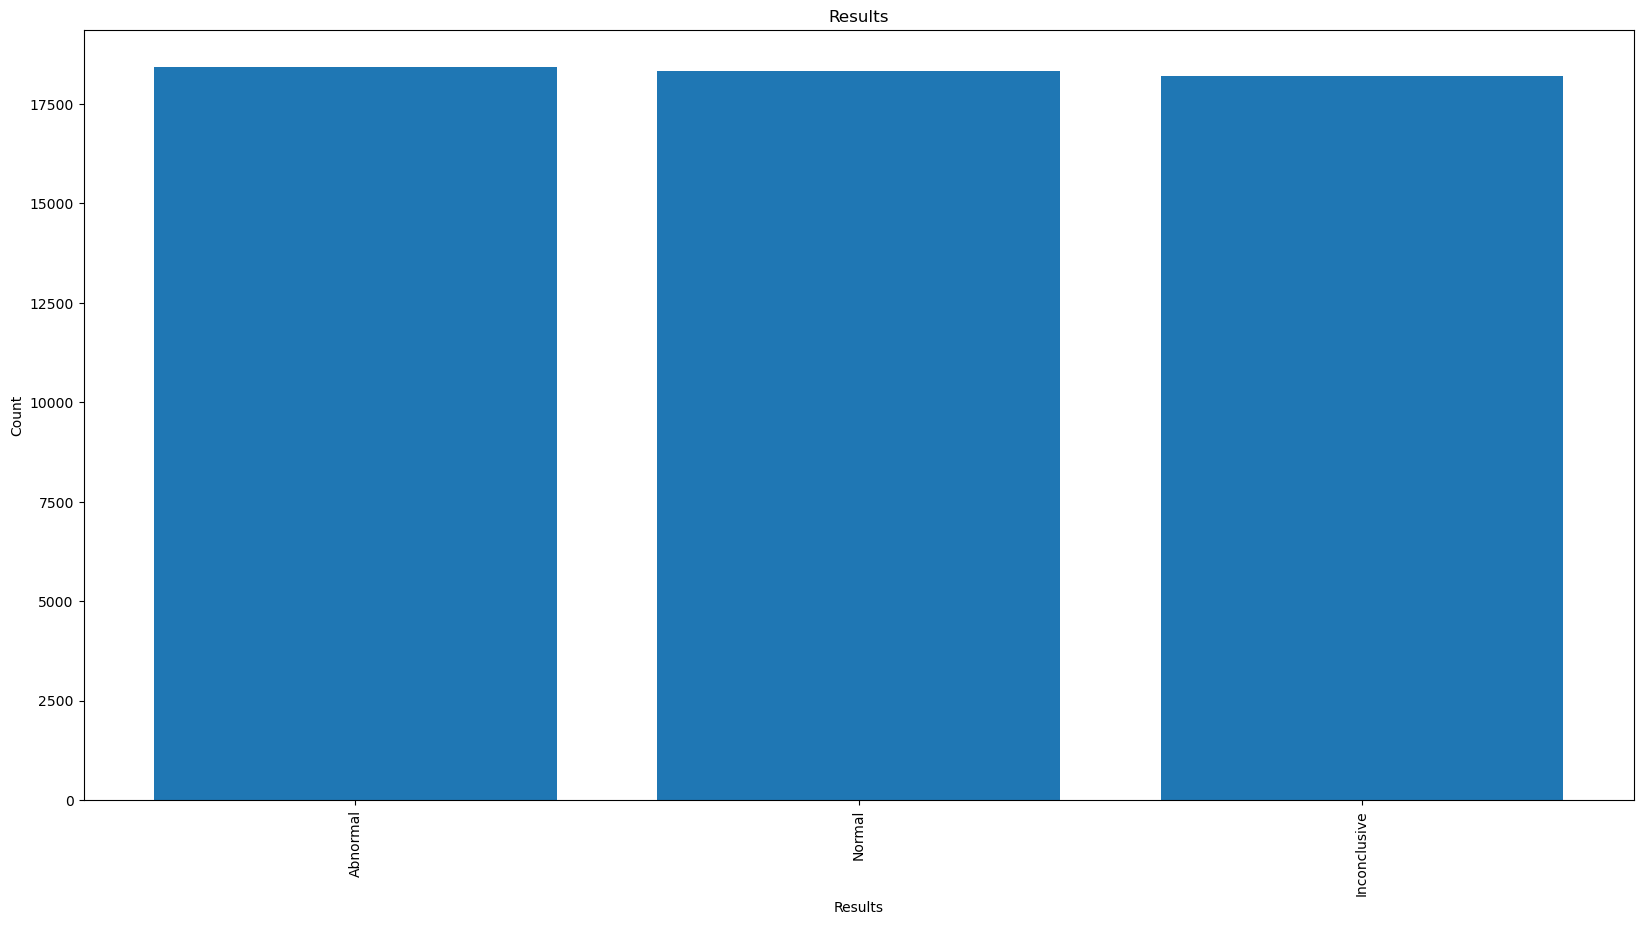

In [23]:
plt.figure(figsize=(20,10))
plt.bar(df['Test Results'].value_counts().sort_values(ascending=False).index,
        df['Test Results'].value_counts().sort_values(ascending=False))
plt.title("Results")
plt.xlabel("Results")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [24]:
df.head(3)
print(df['Medical Condition'].value_counts())

Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: Medical Condition, dtype: int64


In [25]:
df.drop(['Doctor','Hospital'],axis = 1 ,inplace = True)

In [26]:
def split_neg_post(st):
    return st[-1]

In [27]:
df['Blood Type_neg']= df['Blood Type'].apply(split_neg_post) 

In [28]:
df['Blood Type_neg'].head()

0    -
1    +
2    -
3    +
4    +
Name: Blood Type_neg, dtype: object

In [29]:
def split_neg_post_A(st):
    return st[:-1]

In [30]:
df['Blood Type_P']= df['Blood Type'].apply(split_neg_post_A)

In [31]:
df['Blood Type_P'].head()


0     B
1     A
2     A
3     O
4    AB
Name: Blood Type_P, dtype: object

In [32]:
df.drop(['Blood Type'],axis = 1 ,inplace=True)


In [33]:
df.nunique()


Age                      77
Gender                    2
Medical Condition         6
Insurance Provider        5
Billing Amount        50000
Admission Type            3
Medication                5
Test Results              3
Days_spent               30
Blood Type_neg            2
Blood Type_P              4
dtype: int64

In [34]:
cols = df.select_dtypes('object')


In [35]:
cols

,Gender,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Blood Type_neg,Blood Type_P
0,Male,Cancer,Blue Cross,Urgent,Paracetamol,Normal,-,B
1,Male,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive,+,A
2,Female,Obesity,Aetna,Emergency,Aspirin,Normal,-,A
3,Female,Diabetes,Medicare,Elective,Ibuprofen,Abnormal,+,O
4,Female,Cancer,Aetna,Urgent,Penicillin,Abnormal,+,AB
...,...,...,...,...,...,...,...,...
54961,Female,Asthma,Blue Cross,Elective,Penicillin,Abnormal,+,O
54962,Female,Obesity,Cigna,Elective,Aspirin,Normal,-,AB
54963,Female,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal,+,B
54964,Male,Arthritis,Medicare,Elective,Ibuprofen,Abnormal,-,O


# Save Cleaned Data

In [36]:
df.to_csv('Cleaned_HealthCare_Data.csv', index=False)  